In [2]:
from math import *
import random 
%pylab inline
from scipy.optimize import minimize

figsize(10,10)

Populating the interactive namespace from numpy and matplotlib


C:\Users\KU\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['isnan', 'ldexp', 'trunc', 'log10', 'radians', 'isinf', 'modf', 'frexp', 'isfinite', 'sqrt', 'log', 'remainder', 'log2', 'floor', 'log1p', 'degrees', 'sinh', 'hypot', 'random', 'sin', 'fabs', 'tanh', 'cosh', 'isclose', 'exp', 'expm1', 'ceil', 'inf', 'e', 'tan', 'pi', 'nan', 'gamma', 'cos', 'copysign', 'gcd', 'fmod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**2. Convergence order of sequences**

Semilogy plots x and y coordinates using a linear scale on the x-axis and a base-10 logarithmic scale on the y-axis.

$$$$

We talk about the geometric convergence (or linear convergence) of $(x_n)_n$ when :
    
$\lim_{n\to\infty} \frac{|x_n|}{n}$ is constant.

Or in other words when $(x_n)_n$ has asymptotic upper bound $e^{-qn}$, where q is the rate of convergence,

ie : $(x_n)_n \sim \mathcal{O}(e^{-qn})$.

$$$$

We talk about the quadratique convergence of $(x_n)_n$ when :
    
$\lim_{n\to\infty} \frac{|x_n|}{n^2}$ is constant.

Or in other words when $(x_n)_n$ has asymptotic upper bound $e^{-qn^2}$, where q is the rate of convergence,

ie : $(x_n)_n \sim \mathcal{O}(e^{-qn^2})$.

**2.1 First sequence**

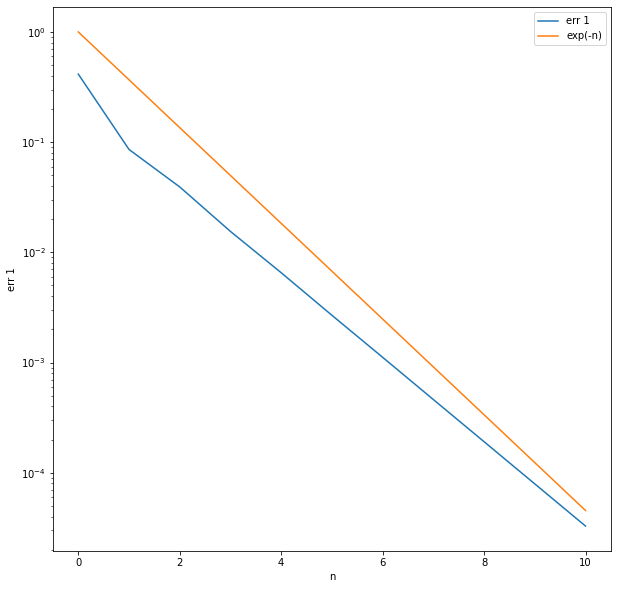

In [2]:
x = 1.
list = [x]
for i in range(10):
    x = x*(1.-x/2.)+1.
    list.append(x)

semilogy(abs(array(list)-sqrt(2)))

semilogy( exp(-1*arange(11)) )

xlabel("n")
ylabel("err 1")
legend(("err 1","exp(-n)"))

Here the convergence rate might be 1, indeed we can see that the orange curve representing the function $e^{-n}$ upper bounds the error "err 1".

The linear convergence is represented by a linear curve on the semi logarithmic graphic.
In this case, the slope of the semilogy gives the convergence rate in base 10.

**2.2 Second sequence**

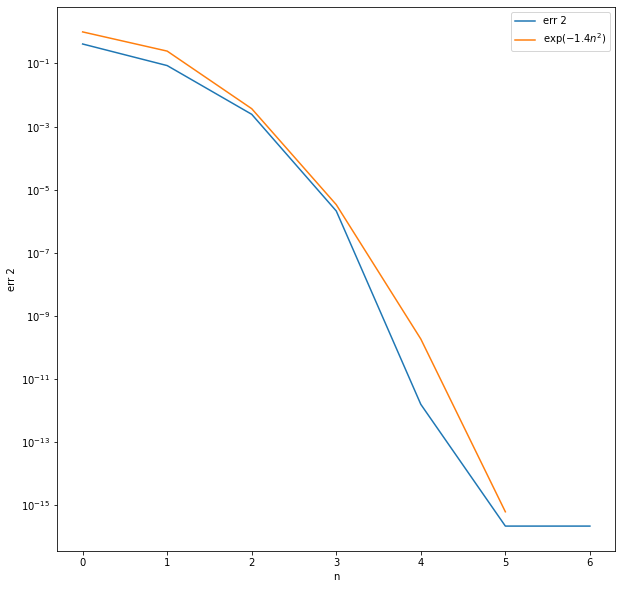

In [3]:
y = 1.
tab = zeros(7)
tab[0] = y

for i in range(6):
    y = y/2. + 1./y
    tab[i+1] = float(y)
    
err2 = abs(tab-sqrt(2))

xlabel("n")
ylabel("err 2")
semilogy(err2)
semilogy( exp(-1.4*arange(6)**2) )
legend(("err 2","exp($-1.4n^2$)"))

# WHY TAKING THE LOG AGAIN ???
#xlabel("n")
#ylabel("log err 2")
#semilogy(abs(log(err2)))
#show()

Here the convergence rate might be something like 1.4, indeed we can see that the orange curve representing the function $e^{-1.4n^2}$ upper bounds the error "err 2".

Therefore convergence is quadratic. This convergence is faster than the linear one seen before.

**2.3 Third sequence**

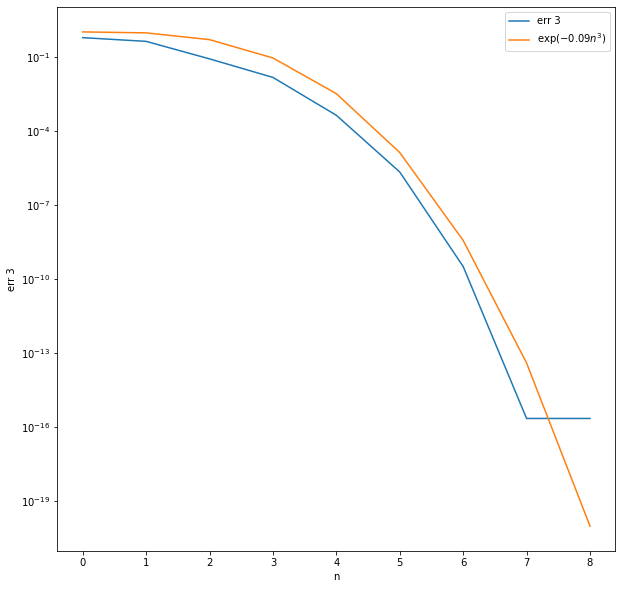

In [4]:
z=[2.,1.]
for i in range(2,9):
    z.append( float( (z[i-1]*z[i-2]) + 2. ) / ( z[i-1]+z[i-2] ) )
    
err3 = abs(array(z)-sqrt(2))

xlabel("n")
ylabel("err 3")
semilogy(err3)
semilogy( exp(-0.09*arange(9)**3) )
legend(("err 3","exp($-0.09n^3$)"))

Here the convergence rate might be something closed to 1 (0.09 for example), indeed we can see that the orange curve representing the function $e^{-0.09n^3}$ upper bounds the error "err 3".

Therefore convergence is cubic. This convergence is faster than the linear one and than the quadratic one.

**3. A first optimization algorithm**

**3.1 Finite difference method**

We apply the Taylor Yound formula with integral form of the remainder to $f(x+\epsilon)$ for f $C^2$ :

$$f(x+\epsilon) = \frac{f^{(0)}(x)}{1} \times 1 + \frac{f^{(1)}(x)}{1} \times (x + \epsilon - x) + \int_{x}^{x+ \epsilon} f^{(2)}(t)(x+ \epsilon - t) dt$$

$$f(x+\epsilon) = f(x) + f^{'}(x) \epsilon + \int_{x}^{x + \epsilon} f^{"}(t) (x + \epsilon - t) dt $$

$$f^{'}(x) = \frac{f(x+ \epsilon) - f(x)}{\epsilon} - \frac{1}{\epsilon} \int_{x}^{x+ \epsilon} f^{"}(t)(x+ \epsilon - t)  dt$$

$$|\frac{\hat{f}(x + \epsilon) - \hat{f}(x)}{\epsilon} - f^{'}(x)| = |\frac{\hat{f}(x + \epsilon) - \hat{f}(x)}{\epsilon} - \frac{f(x+ \epsilon) - f(x)}{\epsilon} + \frac{1}{\epsilon} \int_{x}^{x+ \epsilon} f^{"}(t)(x+ \epsilon - t)  dt|$$

$$|\frac{\hat{f}(x + \epsilon) + \hat{f}(x)}{\epsilon} - f^{'}(x)| = |\frac{\hat{f}(x + \epsilon) - f(x+ \epsilon)}{\epsilon} + \frac{f(x) - \hat{f}(x)}{\epsilon} + \frac{1}{\epsilon} \int_{x}^{x+ \epsilon} f^{"}(t)(x+ \epsilon - t)  dt|$$

$$|\frac{\hat{f}(x + \epsilon) + \hat{f}(x)}{\epsilon} - f^{'}(x)| \leq |\frac{\hat{f}(x + \epsilon) - f(x+ \epsilon)}{\epsilon}| + |\frac{f(x) - \hat{f}(x)}{\epsilon}| + \frac{1}{\epsilon} |\int_{x}^{x+ \epsilon} f^{"}(t)(x+ \epsilon - t)  dt|$$

$$|\frac{\hat{f}(x + \epsilon) + \hat{f}(x)}{\epsilon} - f^{'}(x)| \leq \frac{\eta}{\epsilon} + \frac{\eta}{\epsilon} + \frac{1}{\epsilon} \int_{x}^{x+ \epsilon}  |f^{"}(t)| |x+ \epsilon - t|  dt$$

$$|\frac{\hat{f}(x + \epsilon) + \hat{f}(x)}{\epsilon} - f^{'}(x)| \leq \frac{2 \eta}{\epsilon} + \frac{1}{\epsilon} \int_{x}^{x+ \epsilon} C |f|_{\infty} (x+ \epsilon - t)  dt$$

$$|\frac{\hat{f}(x + \epsilon) + \hat{f}(x)}{\epsilon} - f^{'}(x)| \leq \frac{2 \eta}{\epsilon} + \frac{C |f|_{\infty}}{\epsilon} \int_{x}^{x+ \epsilon} x+ \epsilon - t dt$$

$$|\frac{\hat{f}(x + \epsilon) + \hat{f}(x)}{\epsilon} - f^{'}(x)| \leq \frac{2 \eta}{\epsilon} + \frac{C |f|_{\infty}}{\epsilon} \frac{\epsilon^2}{2}$$

$$|\frac{\hat{f}(x + \epsilon) + \hat{f}(x)}{\epsilon} - f^{'}(x)| \leq \frac{2 \eta}{\epsilon} + \frac{C \epsilon |f|_{\infty}}{2} $$

We have $|\frac{\hat{f}(x + \epsilon) + \hat{f}(x)}{\epsilon} - f^{'}(x)| \leq \frac{2 \eta}{\epsilon} + \frac{C \epsilon}{2}|f|_{\infty} $ where C is a constant of order 1 and $\hat{f}$ is an $\eta$ - approximation of the function f.

Actually, C is a bound on $|\frac{f^{"}}{f}|_{\infty}$.

The computational error of the finite difference method, represented by $E(\epsilon) = \frac{2 \eta}{\epsilon} + \frac{C \epsilon}{2}|f|_{\infty}$ attains its minimum value for $\epsilon = (\frac{4\eta}{C |f|_{\infty}})^{\frac{1}{2}}$.

$\epsilon = 2 (\frac{\eta}{C |f|_{\infty}})^{\frac{1}{2}}$ should be the optimal value for $\epsilon$.

In [5]:
def diff_finite(f,eps,x):
    return ( f(x+eps)-f(x) ) / eps

eps = 1
f_approximation = diff_finite(sin,eps,1)

while abs(f_approximation-cos(1)) > 10**(-8):
    
    eps = eps/2
    f_approximation = diff_finite(sin,eps,1)
    
print(f"{eps} is an optimal error, indeed the finite difference has value : {f_approximation}, \nwhereas the value of cos evaluated at 1 is {cos(1)}")

eps_finite_diff = eps

1.4901161193847656e-08 is an optimal error, indeed the finite difference has value : 0.5403022989630699, 
whereas the value of cos evaluated at 1 is 0.5403023058681398


**3.2 Centered difference method**

$$f(x+\epsilon) = f(x) + f^{'}(x) \epsilon + \frac{f^{"}(x) \epsilon^2}{2} + \frac{f^{'''}(x) \epsilon^3}{6} + \int_{x}^{x + \epsilon} \frac{f^{""}(t)}{6} (x + \epsilon - t)^3 dt $$

and

$$f(x-\epsilon) = f(x) - f^{'}(x) \epsilon + \frac{f^{"}(x) \epsilon^2}{2} - \frac{f^{'''}(x) \epsilon^3}{6} + \int_{x- \epsilon}^{x} \frac{f^{""}(t)}{6} (x - \epsilon - t)^3 dt $$

So

$$f^{'}(x) = \frac{f(x+\epsilon) - f(x) - \frac{f^{"}(x) \epsilon^2}{2} - \frac{f^{'''}(x) \epsilon^3}{6} - f(x-\epsilon) + f(x) + \frac{f^{"}(x) \epsilon^2}{2} - \frac{f^{'''}(x) \epsilon^3}{6}}{2 \epsilon}$$ $$+ \frac{1}{2\epsilon} \int_{x- \epsilon}^{x} \frac{f^{""}(t)}{6} (x - \epsilon - t)^3 dt - \frac{1}{2\epsilon} \int_{x}^{x+\epsilon} \frac{f^{""}(t)}{6} (x + \epsilon - t)^3 dt $$

$$f^{'}(x) = \frac{f(x+\epsilon) - f(x-\epsilon)}{2 \epsilon} - \frac{f^{'''}(x) \epsilon^3}{6 \epsilon} + \frac{1}{2\epsilon} \int_{x- \epsilon}^{x} \frac{f^{""}(t)}{6} (x - \epsilon - t)^3 dt - \frac{1}{2\epsilon} \int_{x}^{x+\epsilon} \frac{f^{""}(t)}{6} (x + \epsilon - t)^3 dt $$

$$|\frac{\hat{f}(x + \epsilon) - \hat{f}(x - \epsilon)}{2 \epsilon} - f^{'}(x)| = |\frac{\hat{f}(x + \epsilon) - \hat{f}(x - \epsilon)}{2 \epsilon} - \frac{f(x+\epsilon) - f(x-\epsilon)}{2 \epsilon} - \frac{f^{'''}(x) \epsilon^2}{6}$$ $$- \frac{1}{2\epsilon} \int_{x- \epsilon}^{x} \frac{f^{""}(t)}{6} (x - \epsilon - t)^3 dt + \frac{1}{2\epsilon} \int_{x}^{x+\epsilon} \frac{f^{""}(t)}{6} (x + \epsilon - t)^3 dt|$$

$$|\frac{\hat{f}(x + \epsilon) - \hat{f}(x - \epsilon)}{2 \epsilon} - f^{'}(x)| = |\frac{\hat{f}(x + \epsilon) - {f}(x + \epsilon)}{2 \epsilon} + \frac{f(x-\epsilon) - \hat{f}(x-\epsilon)}{2 \epsilon} - \frac{f^{'''}(x) \epsilon^2}{6}$$ $$- \frac{1}{2\epsilon} \int_{x- \epsilon}^{x} \frac{f^{""}(t)}{6} (x - \epsilon - t)^3 dt + \frac{1}{2\epsilon} \int_{x}^{x+\epsilon} \frac{f^{""}(t)}{6} (x + \epsilon - t)^3 dt|$$

Hence

$$|\frac{\hat{f}(x + \epsilon) - \hat{f}(x - \epsilon)}{2 \epsilon} - f^{'}(x)| $$ 

$$\leq |\frac{\hat{f}(x + \epsilon) - {f}(x + \epsilon)}{2 \epsilon}| + |\frac{f(x-\epsilon) - \hat{f}(x-\epsilon)}{2 \epsilon}| + |\frac{f^{'''}(x) \epsilon^2}{6}| + \frac{1}{2\epsilon} \int_{x- \epsilon}^{x} |\frac{f^{""}(t)}{6}| |x - \epsilon - t|^3 dt + \frac{1}{2\epsilon} \int_{x}^{x+\epsilon} |\frac{f^{""}(t)}{6}| |x + \epsilon - t|^3 dt$$

$$\leq |\frac{\hat{f}(x + \epsilon) - {f}(x + \epsilon)}{2 \epsilon}| + |\frac{f(x-\epsilon) - \hat{f}(x-\epsilon)}{2 \epsilon}| + \frac{C |f|_{\infty} \epsilon^2}{6} + \frac{1}{2\epsilon} (\int_{x- \epsilon}^{x} |\frac{f^{""}(t)}{6}| (t - x + \epsilon)^3 dt + \int_{x}^{x+\epsilon} |\frac{f^{""}(t)}{6}| (x - \epsilon - t)^3 dt)$$

$$\leq |\frac{\hat{f}(x + \epsilon) - {f}(x + \epsilon)}{2 \epsilon}| + |\frac{f(x-\epsilon) - \hat{f}(x-\epsilon)}{2 \epsilon}| + \frac{C |f|_{\infty} \epsilon^2}{6} + \frac{1}{2\epsilon} (\int_{x- \epsilon}^{x} |\frac{f^{""}(t)}{6}| (t - x + \epsilon)^3 dt + \int_{x}^{x+\epsilon} |\frac{f^{""}(t)}{6}| (x - \epsilon - t)^3 dt)$$

$$\leq \frac{\eta}{\epsilon} + \frac{C |f|_{\infty} \epsilon^2}{6} + o(|\epsilon|^3)$$

We have $|\frac{\hat{f}(x + \epsilon) - \hat{f}(x - \epsilon)}{2 \epsilon} - f^{'}(x)| \leq \frac{\eta}{\epsilon} + \frac{C \epsilon^2}{6} |f|_{\infty}$ where C is a constant of order 1 and $\hat{f}$ is an $\eta$ - approximation of the function f.

Actually, C is a bound on $|\frac{f^{'''}}{f}|_{\infty}$.

The computational error of the centered difference method, represented by $E(\epsilon) = \frac{\eta}{\epsilon} + \frac{C \epsilon^2}{6} |f|_{\infty}$ attains its minimum value for $\epsilon = (\frac{3 \eta}{C |f|_{\infty}})^{\frac{1}{3}}$ which should be the value optimal for $\epsilon$.

In [9]:
def cent_diff(f,eps,x):
    return ( f(x+eps)-f(x-eps) ) / (2*eps)

eps = 2
f_approximation = cent_diff(sin,eps,1)

while abs(f_approximation-cos(1)) > 10**(-8) :
    
    eps = eps/2
    f_approximation = cent_diff(sin,eps,1)
    
print(f"{eps} is an optimal error, indeed the centered difference has value : {f_approximation}, \nwhereas the value of cos evaluated at 1 is {cos(1)}")

eps_cent_diff = eps

0.000244140625 is an optimal error, indeed the centered difference has value : 0.5403023005007981, 
whereas the value of cos evaluated at 1 is 0.5403023058681398


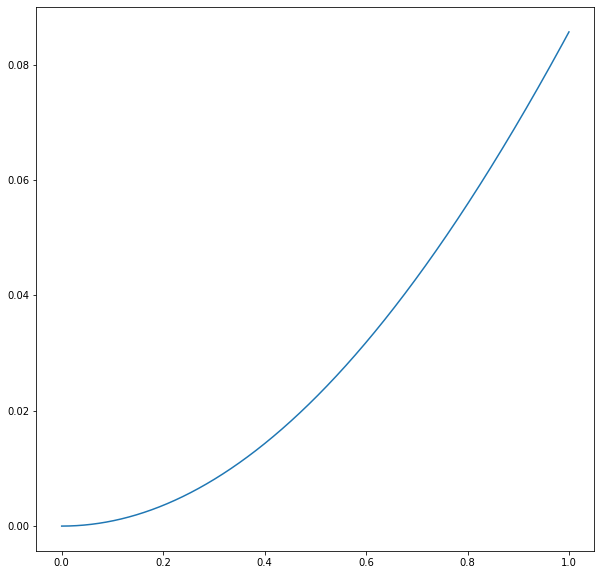

In [11]:
l = []
for i in linspace(0.00001,1,1000000):
    l.append(abs(cent_diff(sin,i,1)-cos(1)))
    
plot(linspace(0.00001,1,1000000), l)

In [7]:
eps_cent_diff / eps_finite_diff

16384.0

The optimal value for $\epsilon$ with the centered difference method is more than 10 000 times bigger than the finite difference method. Therefore, with the centered difference algorithm we do not need to go as far as we do with the finite difference algorithm to get a good approximation of the function of interest. The centered difference is much faster.

**3.3 Optimization with the dichotomic search**

In [8]:
def dichotomic_min(fcvx, eta, a0, b0, eps = 10**(-10)):
    
    a=a0
    b=b0
    
    while abs(b-a) > eta :
        
        derivative = cent_diff(fcvx, eps, (a+b)/2)
        
        if derivative < 0 :
            a = (a+b)/2
        else :
            b = (a+b)/2
            
    return a, b

(-9.313225746154785e-09, 0.0)


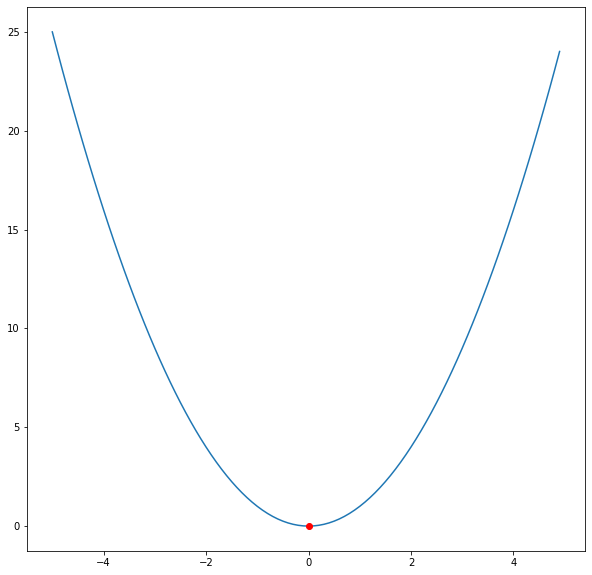

In [9]:
def f_test(x):
    return x**2

result = dichotomic_min(f_test, 10**(-8), -5, 5)
print(result)

x = arange(-5, 5, 0.1)

plot(x, f_test(x))

c, d = result

xm = d - (d-c)/2
ym = f_test(xm)

plot(xm, ym, '-ro')

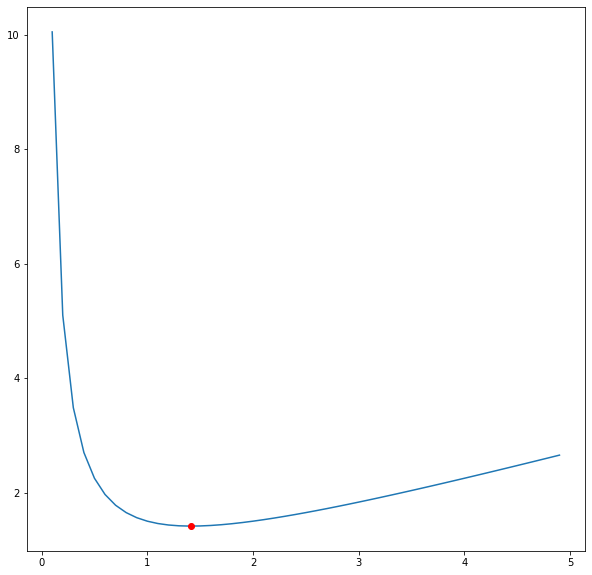

In [10]:
def f_test(x):
    return x/2 + 1/x

result = dichotomic_min(f_test, 10**(-8), 0.5, 5)

x = arange(0.1, 5, 0.1)

plot(x, f_test(x))

c, d = result

xm = d - (d-c)/2
ym = f_test(xm)

plot(xm, ym, '-ro')

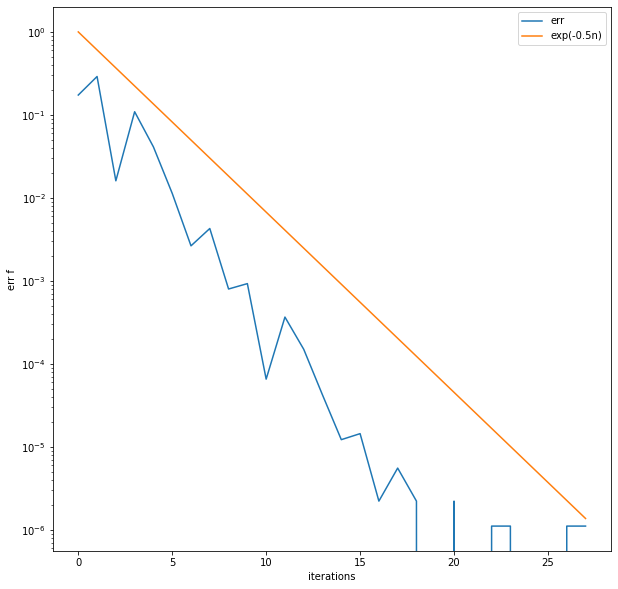

In [11]:
""" Here we look at the rate of convergence of the dichotomy method.
    In this method, the derivative of the fucntion is computed each 
    iteration until it tends to be 0. 
    At the limit point where the derivative is 0 we have finished."""

def f_test(x):
    return float(x)/2 + 1/float(x)

f=[]

a=0.5
b=3

while abs(b-a) > 10**(-8) :
    
    f.append(cent_diff(f_test, 10**(-10), (a+b)/2))
    
    if f[-1] < 0 :
        a = (a+b)/2
    else :
        b = (a+b)/2

errf = abs(array(f))

xlabel("iterations")
ylabel("err f")

semilogy(errf)

semilogy( exp(-0.5*arange(len(f))) )

legend(("err","exp(-0.5n)"))

This method seems to be a linear convergence method ; the convergence rate might be 0.5, indeed we can see that the orange curve representing the function $e^{-\frac{1}{2}n}$ upper bounds the error "err".

So it is a "slow" convergence method.

**4. Application : finding the shortest path in two fluids**

New Version

Give an of optimal path not built from the union of 2 segments :

I have no idea at all...

In [12]:
class Point:
    """ To define points. """

    def __init__(self, x = None, y = None):
        """ Create a new point (if not precised, will create randomly in [-2, 2]x[-2, 2]). """
        
        if (x==None) | (y==None):
            x = 4*random.random()-2
            y = 4*random.random()-2
        
        self.x = x
        self.y = y
        
    def __str__(self):
            return "({0}, {1})".format(self.x, self.y)

In [13]:
def distance(ptA,ptB):
    return sqrt( (ptA.x-ptB.x)**2 + (ptA.y-ptB.y)**2 )

def time(distance, speed):
    return distance/speed

def middle(ptA, ptB):
    
    if ptB.x >= ptA.x:
        X = ptB.x - (ptB.x-ptA.x)/2
    else:
        X = ptA.x - (ptA.x-ptB.x)/2
        
    if ptB.y >= ptA.y:
        Y = ptB.y - (ptB.y-ptA.y)/2
    else:
        Y = ptA.y - (ptA.y-ptB.y)/2
        
    return Point(X, Y)

In [14]:
def where(pt, f_cvx, a0, b0):
    
    """ where() return the domain (1 or 2) in which is a point 
    (compared to the convex function at which we are looking). """
    
    result = dichotomic_min(f_cvx, 10**(-8), a0, b0)

    c, d = result

    min_f = Point( d - (d-c)/2, f_cvx(d - (d-c)/2) )
    
    if pt.y > f_cvx(pt.x) : # then point is above the convex function, so it is in domain 1
        return 1
    else : # then point is below the convex function, so it is in domain 2
        return 2

In [15]:
def intersection(f, ptA, ptB):
    
    """ Return the intersection point (coord. x only) between the segment [AB] and the function f. """
    
    interval = arange(-2, 2, 0.0001)
    
    if ptA.x != ptB.x:
        
        M = (ptA.y-ptB.y)/(ptA.x-ptB.x)
        P = ptA.y-M*ptA.x
        
        return interval[ argmin( abs(P + interval*M - f(interval)) ) ]

In [16]:
def get_intersection_point(V1, V2, ptA, ptB, f_cvx, a0, b0):
    
    """ get_intersection_point() look for the optimal point of the curve where we have 
        to go from one domain to the other.
        We take into account 2 different situations :
        - the optimal point of the curve to pass through is the minimum of the convex function,
        - the optimal point of the curve to pass through is the intersection between the curve 
          and the segment defined between the two points considered.
          
        If the points are in different domains :
            > We compare both situation and return the point for which the path is faster.
        If the points are in the same domain :
            > There is no point of intersection to return. We need to return something so
              we will return the middle point of the segment.
              
        The function return the optimal point to go through and the time."""
    
    if where(ptA, f_cvx, a0, b0) == where(ptB, f_cvx, a0, b0):
        
        if where(ptA, f_cvx, a0, b0) == 1:
            return middle(ptA, ptB), time( distance(ptA,ptB), V1 )
        else:
            return middle(ptA, ptB), time( distance(ptA,ptB), V2 )
    
    else:
        
        result = dichotomic_min(f_cvx, 10**(-8), a0, b0)
        c, d = result
        min_f = Point( d - (d-c)/2, f_cvx(d - (d-c)/2) )
        
        intersect = Point( intersection(f_cvx, ptA, ptB), f_cvx(intersection(f_cvx, ptA, ptB)) )
        
        if where(ptA, f_cvx, a0, b0) == 1:
            
            situation1 = time( distance(ptA,min_f), V1 ) + time( distance(ptB,min_f), V2 )
            situation2 = time( distance(ptA,intersect), V1 ) + time( distance(ptB,intersect), V2 )
            
        else:
            
            situation1 = time( distance(ptA,min_f), V2 ) + time( distance(ptB,min_f), V1 )
            situation2 = time( distance(ptA,intersect), V2 ) + time( distance(ptB,intersect), V1 )
            
        if situation1 <= situation2 :
            print("The optimal point of the curve to pass through is the minimum of the convex function.")
            return min_f, situation1
        else:
            print("The optimal point of the curve to pass through is the intersection between the curve \nand the segment defined between the two points considered.")
            return intersect, situation2

In [17]:
def f_cvx(x):
    return x**2

In [20]:
ptA = Point()
ptB = Point()

print(ptA)
print(ptB)

(-0.35747737911038424, 0.3266632891168806)
(-0.33174194333154006, -1.5446548703669372)


The optimal point of the curve to pass through is the minimum of the convex function.

cost 7.902613414472966


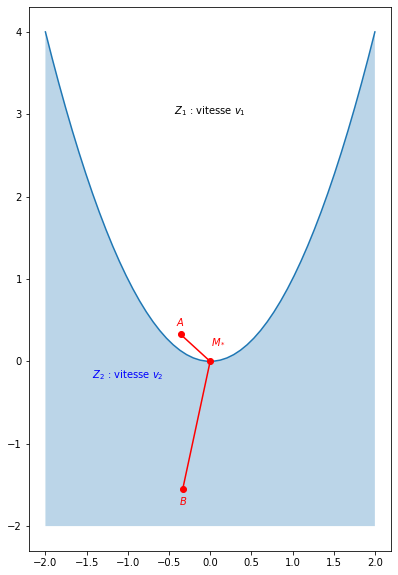

In [21]:
point_to_draw, time_spent = get_intersection_point(150, 0.2, ptA, ptB, f_cvx, -5, 5)

print(f"\ncost {time_spent}")

xm = point_to_draw.x
ym = point_to_draw.y

X = linspace(-2,2)
plot(X,f_cvx(X))

fill_between(X,f_cvx(X),-2,alpha=0.3)
plot([ptA.x,xm,ptB.x],[ptA.y,ym,ptB.y],'-ro')

text(ptA.x, ptA.y+.1, "$A$", color='r', horizontalalignment='center')
text(ptB.x, ptB.y-.2, "$B$", color='r', horizontalalignment='center')
text(xm+.1 ,ym+.2, "$M_*$", color='r', horizontalalignment='center')
text(-1, -.2, "$Z_2$ : vitesse $v_2$", color='b', horizontalalignment='center')
text(0, 3, "$Z_1$ : vitesse $v_1$", horizontalalignment='center')
axis('scaled')
show()

To ameliorate this 4th part we should take into account each possible path and compare the time spent.
Moreover, we should check that the two segments built (when 2) are each in a different domain and do not cross both domains (see situation in which the angle between the two segment is sharp).

SOURCES

https://math.unm.edu/~jehanzeb/files/teaching/fa19/math375/lecture02.pdf
    
http://cis.poly.edu/~mleung/CS3734/s03/ch01/derivative1c44.pdf